<a href="https://colab.research.google.com/github/Evdjina/Systeme-de-gestion-de-bibliotheque/blob/main/Mon_projet_programmation_avec_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install spacy
!pip install gensim
!pip install matplotlib
import nltk
nltk.download('punkt')
!python -m spacy download fr_core_news_sm


# Fonction pour lire un fichier texte et retourner le contenu sous forme de chaîne
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Exemple de chemins de fichiers pour Molière et Baudelaire (ajustez les chemins si nécessaire)
moliere_text_path = '/content/Molière 1.txt'  # Remplace par le chemin réel
baudelaire_text_path = '/content/Beaudelaire.txt'  # Remplace par le chemin réel

# Lire le contenu des fichiers
moliere_text = read_text_file(moliere_text_path)
baudelaire_text = read_text_file(baudelaire_text_path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 53.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import nltk
import spacy

# Télécharger les ressources nécessaires de NLTK
nltk.download('punkt_tab')

# Télécharger le modèle fr_core_news_sm pour SpaCy
!python -m spacy download fr_core_news_sm

# Initialiser SpaCy pour la lemmatisation
nlp = spacy.load("fr_core_news_sm")

# Tokenisation avec NLTK
moliere_tokens = nltk.word_tokenize(moliere_text)
baudelaire_tokens = nltk.word_tokenize(baudelaire_text)

# Fonction pour nettoyer les tokens (retirer la ponctuation, les caractères spéciaux, et convertir en minuscules)
def clean_tokens(tokens):
    cleaned_tokens = [token.lower() for token in tokens if token.isalpha()]
    return cleaned_tokens

# Nettoyer les tokens
moliere_tokens_cleaned = clean_tokens(moliere_tokens)
baudelaire_tokens_cleaned = clean_tokens(baudelaire_tokens)

# Afficher quelques tokens nettoyés pour vérifier
print("Molière - Tokens nettoyés :", moliere_tokens_cleaned[:100])
print("Baudelaire - Tokens nettoyés :", baudelaire_tokens_cleaned[:100])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


  Using cached https://github.com/explosion/spacy-models/releases/download/fr_core_news_sm-3.7.0/fr_core_news_sm-3.7.0-py3-none-any.whl (16.3 MB)
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Molière - Tokens nettoyés : ['doctype', 'html', 'html', 'en', 'head', 'meta', 'style', 'div', 'div', 'all', 'initial', 'display', 'block', 'center', 'li', 'all', 'initial', 'display', 'block', 'bold', 'center', 'all', 'inherit', 'center', 'bold', 'all', 'inherit', 'center', 'normal', 'p', 'medium', 'all', 'initial', 'strong', 'normal', 'auto', 'center', 'center', 'display', 'block', 'table', 'display', 'table', 'left', 'auto', 'auto', 'title', 'the', 'middle', 'class', 'gentleman', 'by', 'moliere', 'style', 'bod

In [ ]:
from nltk.probability import FreqDist

# Calcul de la fréquence des mots
def word_frequency(tokens):
    fdist = FreqDist(tokens)
    return fdist

# Calcul des fréquences pour chaque texte
moliere_freq = word_frequency(moliere_tokens_cleaned)
baudelaire_freq = word_frequency(baudelaire_tokens_cleaned)

# Affichage des 30 mots les plus fréquents
print("Molière - Top 30 des mots les plus fréquents :", moliere_freq.most_common(30))
print("Baudelaire - Top 30 des mots les plus fréquents :", baudelaire_freq.most_common(30))

Molière - Top 30 des mots les plus fréquents : [('p', 1128), ('i', 813), ('the', 793), ('to', 716), ('you', 703), ('jourdain', 538), ('and', 488), ('of', 466), ('a', 425), ('monsieur', 422), ('that', 354), ('is', 324), ('it', 266), ('in', 251), ('me', 230), ('master', 211), ('for', 196), ('my', 186), ('madame', 180), ('he', 173), ('have', 168), ('with', 166), ('this', 165), ('your', 163), ('what', 159), ('do', 152), ('are', 151), ('all', 147), ('covielle', 132), ('not', 127)]
Baudelaire - Top 30 des mots les plus fréquents : [('br', 1226), ('the', 728), ('and', 385), ('of', 375), ('a', 326), ('to', 226), ('in', 167), ('with', 146), ('span', 133), ('or', 116), ('that', 108), ('you', 102), ('i', 100), ('project', 90), ('my', 88), ('is', 84), ('like', 83), ('thy', 76), ('this', 74), ('for', 72), ('by', 65), ('from', 64), ('all', 63), ('p', 63), ('hr', 58), ('width', 58), ('b', 55), ('div', 54), ('pginternal', 54), ('not', 53)]


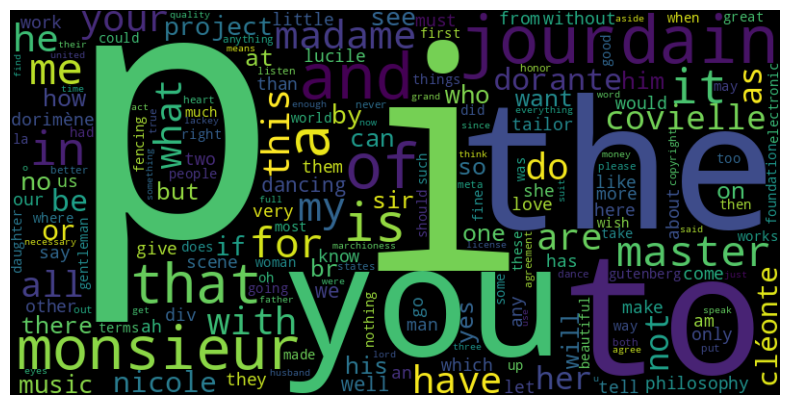

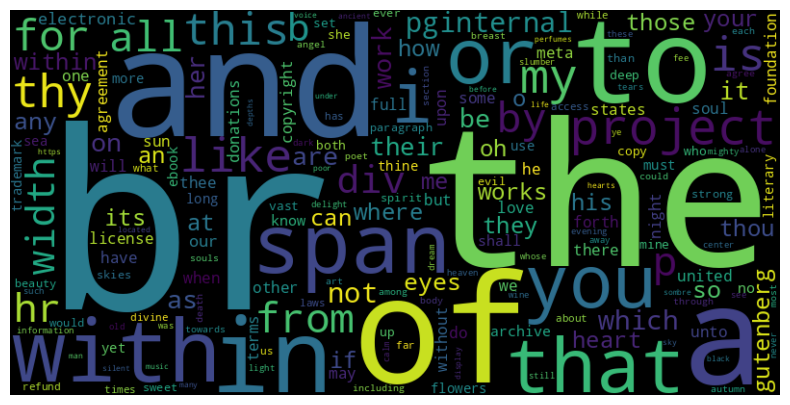

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fonction pour générer un nuage de mots
def generate_wordcloud(frequency_dist):
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(frequency_dist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Générer et afficher le nuage de mots pour Molière
generate_wordcloud(moliere_freq)

# Générer et afficher le nuage de mots pour Baudelaire
generate_wordcloud(baudelaire_freq)

In [ ]:

from gensim.models import Word2Vec

# Créer un modèle Word2Vec pour chaque texte
def train_word2vec_model(tokens):
    model = Word2Vec([tokens], vector_size=100, window=5, min_count=1, workers=4)
    return model

# Entraîner les modèles pour Molière et Baudelaire
moliere_model = train_word2vec_model(moliere_tokens_cleaned)
baudelaire_model = train_word2vec_model(baudelaire_tokens_cleaned)

# Trouver les mots similaires pour un mot donné
def find_similar_words(model, word, topn=5):
    if word in model.wv:
        return model.wv.most_similar(word, topn=topn)
    else:
        return f"Le mot '{word}' n'est pas dans le vocabulaire du modèle."

# Trouver les mots similaires pour un mot donné
print("Molière - Mots similaires à 'the' :", find_similar_words(moliere_model, 'the'))
print("Baudelaire - Mots similaires à 'and' :", find_similar_words(baudelaire_model, 'and'))

Molière - Mots similaires à 'the' : [('and', 0.9998912811279297), ('have', 0.9998810291290283), ('a', 0.999873161315918), ('you', 0.9998690485954285), ('of', 0.9998640418052673)]
Baudelaire - Mots similaires à 'and' : [('br', 0.999851405620575), ('of', 0.9998253583908081), ('the', 0.9998247623443604), ('to', 0.9998149871826172), ('by', 0.999782145023346)]


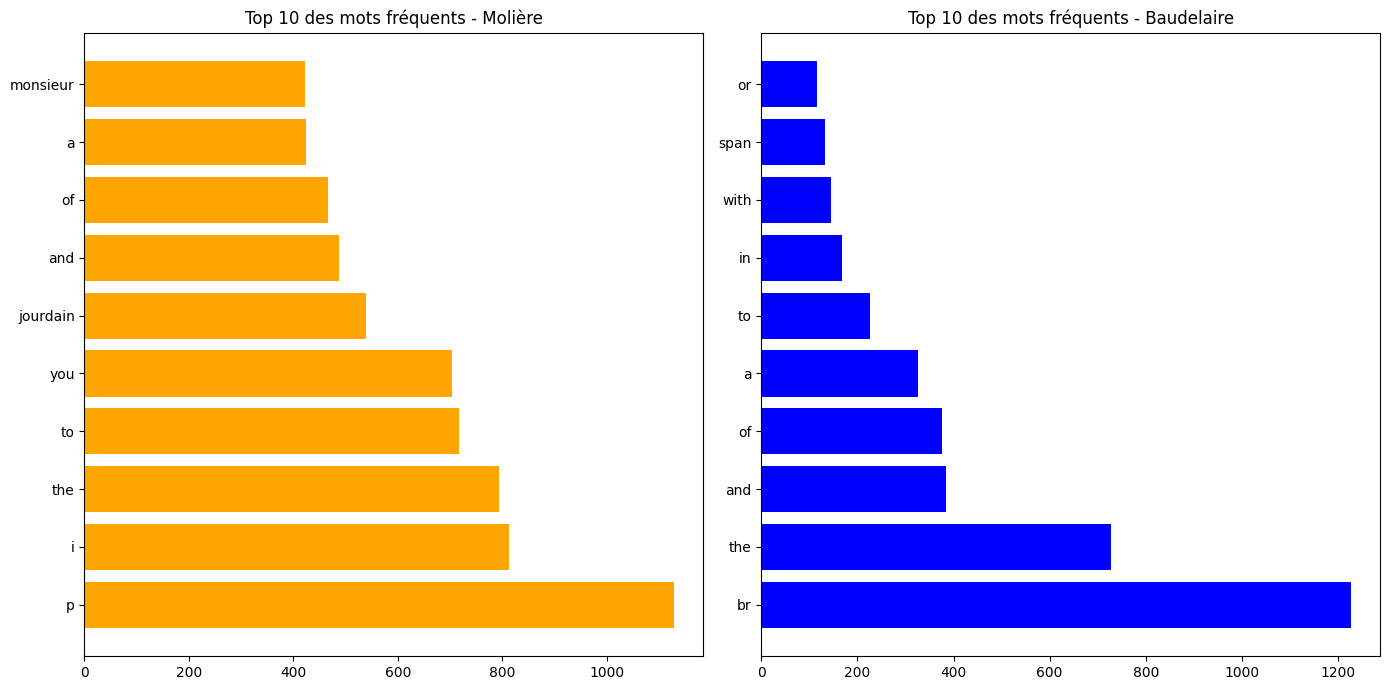

In [ ]:
# Visualiser les 10 mots les plus fréquents pour Molière et Baudelaire
def plot_most_common_words(moliere_freq, baudelaire_freq):
    moliere_top_10 = [item[0] for item in moliere_freq.most_common(10)]
    baudelaire_top_10 = [item[0] for item in baudelaire_freq.most_common(10)]

    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    # Graphique pour Molière
    axes[0].barh(moliere_top_10, [item[1] for item in moliere_freq.most_common(10)], color='orange')
    axes[0].set_title("Top 10 des mots fréquents - Molière")

    # Graphique pour Baudelaire
    axes[1].barh(baudelaire_top_10, [item[1] for item in baudelaire_freq.most_common(10)], color='blue')
    axes[1].set_title("Top 10 des mots fréquents - Baudelaire")

    plt.tight_layout()
    plt.show()

# Afficher les graphiques comparatifs
plot_most_common_words(moliere_freq, baudelaire_freq)

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Calcul du sentiment des deux textes
moliere_sentiment = sentiment_analysis(moliere_text)
baudelaire_sentiment = sentiment_analysis(baudelaire_text)

print("Sentiment de Molière (valeur de polarité) :", moliere_sentiment)
print("Sentiment de Baudelaire (valeur de polarité) :", baudelaire_sentiment)

Sentiment de Molière (valeur de polarité) : 0.20481758127789693
Sentiment de Baudelaire (valeur de polarité) : 0.08889006693093235


In [ ]:
import spacy

nlp = spacy.load('fr_core_news_sm')

def sentence_length_analysis(text):
    doc = nlp(text)
    sentence_lengths = [len(sent) for sent in doc.sents]
    return sum(sentence_lengths) / len(sentence_lengths) if sentence_lengths else 0

# Analyse de la longueur moyenne des phrases
moliere_avg_sentence_length = sentence_length_analysis(moliere_text)
baudelaire_avg_sentence_length = sentence_length_analysis(baudelaire_text)

print("Longueur moyenne des phrases de Molière :", moliere_avg_sentence_length)
print("Longueur moyenne des phrases de Baudelaire :", baudelaire_avg_sentence_length)

Longueur moyenne des phrases de Molière : 14.30744905130007
Longueur moyenne des phrases de Baudelaire : 12.274193548387096


In [ ]:
from collections import Counter

def pos_analysis(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]
    return Counter(pos_tags)

# Analyse des parties du discours pour Molière et Baudelaire
moliere_pos = pos_analysis(moliere_text)
baudelaire_pos = pos_analysis(baudelaire_text)

print("Répartition des POS pour Molière :", moliere_pos)
print("Répartition des POS pour Baudelaire :", baudelaire_pos)

Répartition des POS pour Molière : Counter({'NOUN': 7218, 'PROPN': 5308, 'PUNCT': 5041, 'SPACE': 4885, 'PRON': 3779, 'ADP': 3651, 'ADJ': 3284, 'X': 2586, 'VERB': 2327, 'ADV': 798, 'AUX': 635, 'DET': 634, 'NUM': 361, 'CCONJ': 140, 'SCONJ': 48, 'INTJ': 17, 'SYM': 7})
Répartition des POS pour Baudelaire : Counter({'NOUN': 3114, 'X': 2276, 'ADJ': 2182, 'PROPN': 2080, 'SPACE': 1985, 'PRON': 1956, 'VERB': 1822, 'PUNCT': 1541, 'ADP': 1072, 'ADV': 559, 'AUX': 519, 'NUM': 287, 'DET': 244, 'CCONJ': 127, 'SCONJ': 16, 'SYM': 5, 'INTJ': 1})


In [ ]:

from nltk import ngrams
from collections import Counter

def ngram_analysis(text, n=2):
    tokens = nltk.word_tokenize(text)
    ngrams_list = ngrams(tokens, n)
    return Counter(ngrams_list)

# Analyser les bigrammes pour Molière et Baudelaire
moliere_bigrams = ngram_analysis(moliere_text, n=2)
baudelaire_bigrams = ngram_analysis(baudelaire_text, n=2)

print("Bigrammes pour Molière :", moliere_bigrams.most_common(10))
print("Bigrammes pour Baudelaire :", baudelaire_bigrams.most_common(10))

Bigrammes pour Molière : [(('>', '<'), 1532), (('<', 'p'), 1126), (('p', '>'), 1126), (('<', '/p'), 1126), (('/p', '>'), 1126), (('.', '<'), 748), (('JOURDAIN', ':'), 448), (('>', 'MONSIEUR'), 345), (('MONSIEUR', 'JOURDAIN'), 345), (('<', 'i'), 271)]
Bigrammes pour Baudelaire : [(('<', 'br'), 1226), (('br', '>'), 1226), (('>', '<'), 1133), ((',', '<'), 487), (("''", '>'), 388), (('style=', "''"), 186), ((';', "''"), 186), (('margin-left', ':'), 137), (('<', 'span'), 133), (('<', '/span'), 133)]


In [ ]:

def ner_analysis(text):
    doc = nlp(text)
    return [(entity.text, entity.label_) for entity in doc.ents]

# Analyse des entités nommées dans les deux textes
moliere_ner = ner_analysis(moliere_text)
baudelaire_ner = ner_analysis(baudelaire_text)

print("Entités nommées dans Molière :", moliere_ner)
print("Entités nommées dans Baudelaire :", baudelaire_ner)

Entités nommées dans Molière : [('html', 'MISC'), ('html', 'MISC'), ('charset="utf-8"><style', 'LOC'), ('center', 'LOC'), ('bold', 'PER'), ('center', 'LOC'), ('center', 'LOC'), ('bold', 'PER'), ('center', 'LOC'), ('-4em', 'LOC'), ('center', 'LOC'), ('center', 'LOC'), ('display', 'PER'), ('The Middle Class Gentleman', 'MISC'), ('Moliere', 'MISC'), ('@media', 'ORG'), ('0.75em', 'LOC'), ('h1', 'LOC'), ('h2', 'LOC'), ('h3', 'LOC'), ('h4', 'ORG'), ('h5', 'LOC'), ('h6', 'LOC'), ('center', 'LOC'), ('width', 'MISC'), ('center', 'LOC'), ('DDE', 'ORG'), ('0.75em', 'LOC'), ('div.fig', 'LOC'), ('center', 'LOC'), ('href="http://purl.org/dc/', 'ORG'), ('href="http://purl.org/dc/terms/', 'ORG'), ('content="The Middle-Class Gentleman', 'LOC'), ('name="dcterms.modified', 'MISC'), ('name="marcrel.trl', 'PER'), ('Philip Dwight', 'PER'), ('France', 'LOC'), ('Drama', 'LOC'), ('Social life and customs', 'ORG'), ('Drama', 'LOC'), ('name="dcterms.created', 'MISC'), ('name="generator', 'PER'), ('Gutenberg', 'P

In [ ]:
!pip install gensim

In [ ]:
from gensim import corpora
from gensim.models import LdaModel

def lda_analysis(text, num_topics=3):
    tokens = clean_tokens(nltk.word_tokenize(text))  # Tokenisation et nettoyage
    dictionary = corpora.Dictionary([tokens])
    corpus = [dictionary.doc2bow(tokens)]

    lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    return lda.print_topics(num_topics=num_topics)

# Analyser les thèmes pour Molière et Baudelaire
moliere_lda_topics = lda_analysis(moliere_text)
baudelaire_lda_topics = lda_analysis(baudelaire_text)

print("Thèmes pour Molière :")
for topic in moliere_lda_topics:
    print(topic)

print("Thèmes pour Baudelaire :")
for topic in baudelaire_lda_topics:
    print(topic)

Thèmes pour Molière :
(0, '0.001*"p" + 0.001*"i" + 0.001*"the" + 0.001*"to" + 0.001*"of" + 0.000*"you" + 0.000*"jourdain" + 0.000*"and" + 0.000*"is" + 0.000*"that"')
(1, '0.048*"p" + 0.034*"i" + 0.033*"the" + 0.030*"to" + 0.030*"you" + 0.023*"jourdain" + 0.021*"and" + 0.020*"of" + 0.018*"a" + 0.018*"monsieur"')
(2, '0.002*"p" + 0.001*"i" + 0.001*"you" + 0.001*"to" + 0.001*"the" + 0.001*"and" + 0.001*"jourdain" + 0.001*"of" + 0.001*"monsieur" + 0.001*"a"')
Thèmes pour Baudelaire :
(0, '0.001*"br" + 0.001*"the" + 0.000*"and" + 0.000*"a" + 0.000*"of" + 0.000*"to" + 0.000*"in" + 0.000*"with" + 0.000*"my" + 0.000*"span"')
(1, '0.092*"br" + 0.055*"the" + 0.029*"and" + 0.028*"of" + 0.024*"a" + 0.017*"to" + 0.013*"in" + 0.011*"with" + 0.010*"span" + 0.009*"or"')
(2, '0.001*"br" + 0.001*"the" + 0.001*"and" + 0.001*"of" + 0.001*"a" + 0.000*"to" + 0.000*"with" + 0.000*"in" + 0.000*"span" + 0.000*"i"')


In [ ]:
!pip install scikit-learn
!pip install gensim

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')

# Transformer les textes en vecteurs TF-IDF
tfidf_matrix = vectorizer.fit_transform([moliere_text, baudelaire_text])

# Calculer la similarité cosinus
similarity_score = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]

print(f"Similarité Cosinus (TF-IDF) entre Molière et Baudelaire : {similarity_score:.2f}")

Similarité Cosinus (TF-IDF) entre Molière et Baudelaire : 0.10
